# 2-Classifying Problem with Single qubit[Stochastic]

In [1]:
import pennylane as qml
from pennylane.optimize import GradientDescentOptimizer
from pennylane import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from mpl_toolkits.mplot3d import Axes3D

### Data Generation

In [2]:
# Setting a random seed for reproducing
np.random.seed(32)

# Making a traing dataset of points inside and outside of a circle
def Circle(samples, condition = [[0.0, 0.0], np.sqrt(2 / np.pi)]):
    """
    INPUT
    samples : the number of data points we will make
    center : center of the circle    
    radius : radius of the circle
    condition : conditions of the circle (condition[0] = center, condition[1] = radius)
    
    OUTPUT
    data points & labels(In - 0/Out - 1) for each point & Condition
    """
    points= []
    labels = []

    for i in range(samples):
        
        # Mading sample points
        point = 2*np.random.rand(2)-1
        label = 0

        # Changing label to 1 if it is out of the circle
        if np.linalg.norm(point - condition[0]) > condition[1]:
            label = 1
        
        # Collecting the sample points
        points.append(point)
        labels.append(label)

    return np.array(points, requires_grad = False), np.array(labels, requires_grad = False), condition

# ----------------------------------------------------------------------------------------------- #

def Sin(samples, condition = [1]):
    """
    INPUT
    samples : the number of data points we will generate
    condition : condtion of the sin function (condition[0] = amplitude, condition[1] = frequency)

    OUTPUT
    data points & labels(Under - 0/Over - 1) for each point & Condition
    """

    points = []
    labels = []

    for i in range(samples):
        point = 2*np.random.rand(2)-1
        label = 0

        if point[1] > condition[0]*np.sin(np.pi*point[0]):
            label = 1

        points.append(point)
        labels.append(label)

    return np.array(points, requires_grad = False), np.array(labels, requires_grad = False), condition

# ----------------------------------------------------------------------------------------------- #

def Square(samples, condition = [[0,0], 3/4]):
    """
    INPUT
    samples : the number of data points we will generate
    condtion : codition of the square (condition[0] = center of the square, condtion[1] = side length for the square)

    OUTPUT
    data points & labels(In - 1/Out - -1) for each point & Condition
    """
    points= []
    labels = []
    
    for i in range(samples):
        
        # Mading sample points
        point = 2*np.random.rand(2)-1
        label = 0

        # Changing the labels wich is outside of the square
        if np.abs(point[0]) > condition[1]:
            label = 1

        if np.abs(point[1]) > condition[1]:
            label = 1

        # Collecting the sample points
        points.append(point)
        labels.append(label)

    return np.array(points, requires_grad = False), np.array(labels, requires_grad = False), condition

    

# ----------------------------------------------------------------------------------------------- #

def Sphere(samples, condition = [[0,0,0], np.sqrt(2 / np.pi)]):
    """
    INPUT
    samples : the number of data points we will generate
    condtion : codition of the sphere (condition[0] = center of the sphere, condtion[1] = radius of the sphere)

    OUTPUT
    data points & labels(In - 1/Out - -1) for each point & Condition
    """
    points= []
    labels = []

    for i in range(samples):
        
        # Mading sample points
        point = 2*np.random.rand(3)-1
        label = 0

        # Changing label to 1 if it is out of the circle
        if np.linalg.norm(point - condition[0]) > condition[1]:
            label = 1
        
        # Collecting the sample points
        points.append(point)
        labels.append(label)

    return np.array(points, requires_grad = False), np.array(labels, requires_grad = False), condition


# ----------------------------------------------------------------------------------------------- #
def Linear(samples, condition = None):
    """
    INPUT
    samples : the number of data points we will generate

    OUTPUT
    data points & labels(True for points above y=x / False for points below y=x)
    """
    points = []
    labels = []
    
    for i in range(samples):
        # Generating sample points within the range [-1, 1] for both x and y
        point = 2 * np.random.rand(2) - 1
        label = point[1] > point[0]

        # Collecting the sample points and labels
        points.append(point)
        labels.append(label)

    return np.array(points, requires_grad = False), np.array(labels, requires_grad = False), condition


[ 0.71777853 -0.25457769]


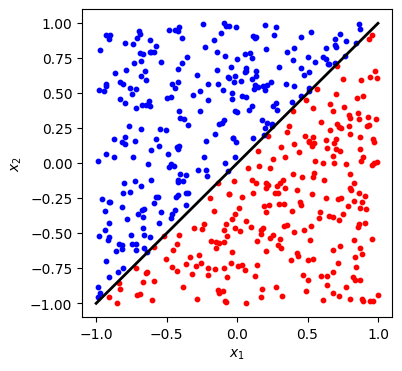

In [3]:
# Plotting the data with figuration
def plot_data(x, y, fig = None, ax = None, problem = "", condition = []):
    """
    Plotting the data with the binary classification

    data_points : data_points that will be plotted on the graph
    data_labels : which classify the points with different colors

    Return
    plot graph
    """
    # Graph figure
    if fig == None :
        fig, ax = plt.subplots(1,1,figsize = (5, 5))
    
    # Giving color for each point
    red = y == 0
    blue = y == 1
    if problem == None:
        print("Define the problem")
    
    if problem == "circle":
        draw_circle = plt.Circle(condition[0], condition[1], fill=False)
        ax.scatter(x[red,0],x[red,1], c = "red", s = 10)
        ax.scatter(x[blue,0],x[blue,1], c = "blue", s = 10)
        ax.add_artist(draw_circle)
        ax.set_xlabel("$x_1$")
        ax.set_ylabel("$x_2$")

    if problem == "sin":
        x1 = np.linspace(-1, 1)
        x2 = condition[0]*np.sin(np.pi*x1)
        ax.scatter(x[red,0],x[red,1], c = "red", s = 10)
        ax.scatter(x[blue,0],x[blue,1], c = "blue", s = 10)
        ax.plot(x1, x2)
        ax.set_xlabel("$x_1$")
        ax.set_ylabel("$x_2$")

    if problem == "square":
        ax.scatter(x[red,0],x[red,1], c = "red", s = 10)
        ax.scatter(x[blue,0],x[blue,1], c = "blue", s = 10)
        ax.add_patch(Rectangle((-condition[1],-condition[1]), 2*condition[1], 2*condition[1],
                               edgecolor = 'black',lw = 2, fill =False))
        ax.set_xlabel("$x_1$")
        ax.set_ylabel("$x_2$")

    if problem == "sphere":
        theta = np.linspace(0,2*np.pi)
        phi = np.linspace(0, 2*np.pi)
        theta, phi = np.meshgrid(theta, phi)
        r = condition[1]
        x1 = condition[0][0] + r*np.cos(theta)*np.sin(phi)
        x2 = condition[0][1] + r*np.sin(theta)*np.sin(phi)
        x3 = condition[0][2] + r*np.cos(phi)
        ax.scatter(x[red,0],x[red,1],x[red,2], c = "red")
        ax.scatter(x[blue,0],x[blue,1],x[blue,2], c = "blue")
        ax.plot_surface(x1, x2, x3, cmap="viridis", ec="k", lw=0.05, alpha=0.0)
        ax.set_box_aspect((1, 1, 1))
        ax.set_xlabel("$x_1$")
        ax.set_ylabel("$x_2$")
        ax.set_zlabel("$x_3$")
        
    if problem == "linear":
        ax.scatter(x[red,0],x[red,1], c = "red", s = 10)
        ax.scatter(x[blue,0],x[blue,1], c = "blue", s = 10)
        ax.plot([-1,1],[-1,1], c='black', lw=2)
        # ax.add_patch(Rectangle((-condition[1],-condition[1]), 2*condition[1], 2*condition[1],
        #                        edgecolor = 'black',lw = 2, fill =False))
        ax.set_xlabel("$x_1$")
        ax.set_ylabel("$x_2$")


fig, ax = plt.subplots(figsize=(4, 4))
# Xpoints, Ylabels, condition = Square(500)
Xpoints, Ylabels, condition  = Linear(500)
print(Xpoints[0])
plot_data(Xpoints, Ylabels, fig = fig, ax = ax, problem = "linear", condition=condition)

### Designing the Quantum Circuit Model

In [4]:
dev_stochastic = qml.device("lightning.qubit", wires=1, shots=1000)

@qml.qnode(dev_stochastic)
def SQC_orign(params, x):
    """
    Design the circuit model with the origin scheme

    INPUT
    params : parameters for the Uitary Gate U(p) (num_layers, 3)
    x : one data point (1, 3)
    y : label of the data point

    OUPUT
    expectation vlaue of the circuit
    """
    ### Origin scheme
    for p in params:
        qml.Rot(*p, wires = 0)
        qml.Rot(*x, wires = 0)
    
    return qml.expval(qml.PauliZ(0))

/home/kban/.local/lib/python3.8/site-packages/pennylane_lightning/lightning_qubit/lightning_qubit.py:822: UserWarning: Pre-compiled binaries for lightning.qubit are not available. Falling back to using the Python-based default.qubit implementation. To manually compile from source, follow the instructions at https://pennylane-lightning.readthedocs.io/en/latest/installation.html.
  warn(


In [5]:
dev_stochastic = qml.device("lightning.qubit", wires=1, shots=1000)

@qml.qnode(dev_stochastic)
def SQC_comp(thetas, weights, x):
    """
    Variational Quantum Circuit for Universal Quantum Classifier
    Fig1.(b) Compressed Scheme

    theta : array of theta...bias (theta_1, theta_2, theta_3)
    weight : array of wegiht...weight (w_1, w_2, w_3)
    x : Datas where we have to input (x_1, x_2, 0)
    y : Expected ouput density matrix

    Returns
    Expectation value
    """
    params = []
    for i in range(len(thetas)):
        params.append(thetas[i]+weights[i]*x)

    # Compressed scheme
    for p in params:
        qml.Rot(*p, wires = 0)
    
    # Calculating the expectation value of the supplied observable
    return qml.expval(qml.PauliZ(0))

### Loss function

In [6]:
def loss_functionO(params, x, y):
    """
    loss function to be minimized

    INPUT
    params : parmeters that will be used
    x : data points for re-uploading
    
    OUTPUT
    loss value to be minimized
    """

    loss = 0.0

    for i in range(len(x)):
        f = SQC_orign(params, x[i])
        if y[i] == 0:
            loss += (1 - f)**2
        else:
            loss += (1 + f)**2
    return loss / len(x)

In [7]:
def loss_functionC(thetas, weights, x, y):
    """
    loss function to be minimized

    INPUT
    circuit : the circuit model of the classifier
    params : parmeters that will be used
    x : data points for re-uploading
    
    OUTPUT
    loss value to be minimized
    """

    loss = 0.0

    for i in range(len(x)):
        f = SQC_comp(thetas, weights, x[i])
        if y[i] == 0:
            loss += (1 - f)**2
        else:
            loss += (1 + f)**2
    return loss / len(x)

### Model Runnig

In [8]:
def model_runningO(params, x):
    """
    Model running with given set of data.

    INPUT
    params : array of parameters (num_layers, 3)
    x : array of data points (num_data, 3)
    y : array of true data labels (num_data, 1)
    state_labels : state representations for labels

    Returns
    Predicted labels for given data, Expectation value of the circuit
    """
    predicted = []
    exepctation_values = []
    for i in range(len(x)):
        expval = SQC_orign(params, x[i])
        exepctation_values.append(expval)
        
        if expval >= 0 :
            predicted.append(0)
        else:
            predicted.append(1)
        
    return np.array(predicted), np.array(exepctation_values)

In [9]:
def model_runningC(thetas, weights, x):
    """
    Model running with given set of data.

    INPUT
    params : array of parameters (num_layers, 3)
    x : array of data points (num_data, 3)
    y : array of true data labels (num_data, 1)
    state_labels : state representations for labels

    Returns
    Predicted labels for given data, Expectation value of the circuit
    """
    predicted = []
    exepctation_values = []
    for i in range(len(x)):
        expval = SQC_comp(thetas, weights, x[i])
        exepctation_values.append(expval)
        
        if expval >= 0 :
            predicted.append(0)
        else:
            predicted.append(1)
        
    return np.array(predicted), np.array(exepctation_values)

### Accuracy Score

In [10]:
def accuracy_score(y_true, y_pred):
    """
    Accuracy score. Evaluating the model with the label comparing.
    
    INPUT
    y_true : Targets(Answers)
    y_predicted : Predictions(labels wihch model has given)

    OUTPUT
    the fraction of correctly classified samples
    """
    score = y_true == y_pred
    return score.sum() / len(y_true)

### Making batches for optimizing

In [11]:
def iterate_minibatches(inputs, targets, batch_size):
    """
    A generator for batches of the input data
    
    INPUT
    inputs : input data
    targets : targets
    batch_size : size of the batch, the number of datas in one batch

    Returns
    one batch of input data of length `batch_size`, one batch of targets of length `batch_size`
    """
    for start_idx in range(0, inputs.shape[0] - batch_size + 1, batch_size):
        idxs = slice(start_idx, start_idx + batch_size)
        yield inputs[idxs], targets[idxs]

## Process of Origin scheme SQC

In [ ]:
# ### Origin scheme sinle-qubit classifier model

# # the numbers of training and test data
# num_training = 500
# num_test = 4000

# # Training datas(where we will train the data)
# # Xdata, y_train, condition = Circle(num_training)
# Xdata, y_train, condition = Linear(num_training)
# # for 2-dim points
# train_data = np.hstack((Xdata, np.zeros((Xdata.shape[0], 1), requires_grad=False))) # point (x_1, x_2, x_3 = 0)

# # Testing datas(where we get the model accuracy)
# Xtest, y_test, condition = Linear(num_test)
# # for 2-dim points
# test_data = np.hstack((Xtest, np.zeros((Xtest.shape[0], 1), requires_grad=False))) # point (x_1, x_2, x_3 = 0)

# # Setting the training options
# num_layers = 2
# epochs = 50
# batch_size = 50
# eta = 0.1

# # Using the Optimizer
# opt = GradientDescentOptimizer(eta)

# # Initializing random weights the parameters for U(p)
# params = np.random.uniform(size=(num_layers, 3), requires_grad=True)

# ### Evaluating the classifier
# # Running the model with test data
# predicted_train, expvals_train = model_runningO(params, train_data)
# accuracy_train = accuracy_score(y_train, predicted_train)

# # Running the model with the test data
# predicted_test, expvals_test = model_runningO(params, test_data)
# accuracy_test = accuracy_score(y_test, predicted_test)

# # Saving predictions with random weights for comparison 
# initial_predictions = predicted_test

# loss = loss_functionO(params, test_data, y_test)

# loss_list, accuracy_train_list, accuracy_test_list = [], [], []
# loss_list.append(loss)
# accuracy_train_list.append(accuracy_train)
# accuracy_test_list.append(accuracy_test)

# print(
#     "Epoch: {:2d} | Cost: {:3f} | Train accuracy: {:3f} | Test Accuracy: {:3f}".format(
#         0, loss, accuracy_train, accuracy_test
#     )
# )

# for it in range(epochs):
#     for Xbatch, ybatch in iterate_minibatches(train_data, y_train, batch_size=batch_size):
#         params, _, _ = opt.step(loss_functionO, params, Xbatch, ybatch)

#     predicted_train, expvals_train = model_runningO(params, train_data)
#     accuracy_train = accuracy_score(y_train, predicted_train)
#     loss = loss_functionO(params, train_data, y_train)

#     predicted_test, expvals_test = model_runningO(params, test_data)
#     accuracy_test = accuracy_score(y_test, predicted_test)
#     res = [it + 1, loss, accuracy_train, accuracy_test]
#     print(
#         "Epoch: {:2d} | Loss: {:3f} | Train accuracy: {:3f} | Test accuracy: {:3f}".format(
#             *res
#         )
#     )

#     loss_list.append(loss)
#     accuracy_train_list.append(accuracy_train)
#     accuracy_test_list.append(accuracy_test)

In [22]:
from pennylane import numpy as np

# 데이터 세트 준비
num_training = 500
num_test = 4000

# 훈련 데이터
Xdata, y_train, condition = Linear(num_training)
train_data = np.hstack((Xdata, np.zeros((Xdata.shape[0], 1), requires_grad=False)))

# 테스트 데이터
Xtest, y_test, condition = Linear(num_test)
test_data = np.hstack((Xtest, np.zeros((Xtest.shape[0], 1), requires_grad=False)))

# 학습 옵션 설정
num_layers = 2
epochs = 50
batch_size = 50
eta = 0.1
# Using the Optimizer
opt = GradientDescentOptimizer(eta)

# Initializing random weights the parameters for U(p)
params = np.random.uniform(size=(num_layers, 3), requires_grad=True)

### Evaluating the classifier
# Running the model with test data
predicted_train, expvals_train = model_runningO(params, train_data)
accuracy_train = accuracy_score(y_train, predicted_train)

# Running the model with the test data
predicted_test, expvals_test = model_runningO(params, test_data)
accuracy_test = accuracy_score(y_test, predicted_test)

# Saving predictions with random weights for comparison 
initial_predictions = predicted_test

loss = loss_functionO(params, test_data, y_test)

loss_list, accuracy_train_list, accuracy_test_list = [], [], []
loss_list.append(loss)
accuracy_train_list.append(accuracy_train)
accuracy_test_list.append(accuracy_test)

print(
    "Epoch: {:2d} | Cost: {:3f} | Train accuracy: {:3f} | Test Accuracy: {:3f}".format(
        0, loss, accuracy_train, accuracy_test
    )
)

# 조기 중단 설정
patience = 5
min_delta = 0.01
best_loss = np.inf
patience_counter = 0

# 학습 및 평가
for it in range(epochs):
    # 미니 배치 이터레이션
    for Xbatch, ybatch in iterate_minibatches(train_data, y_train, batch_size=batch_size):
        params, _, _ = opt.step(loss_functionO, params, Xbatch, ybatch)

    # 훈련 및 테스트 성능 평가
    predicted_train, expvals_train = model_runningO(params, train_data)
    accuracy_train = accuracy_score(y_train, predicted_train)
    loss = loss_functionO(params, train_data, y_train)
    

    loss_list.append(loss)
    accuracy_train_list.append(accuracy_train)
    accuracy_test_list.append(accuracy_test)    
    predicted_test, expvals_test = model_runningO(params, test_data)
    accuracy_test = accuracy_score(y_test, predicted_test)

    # 출력
    print(
        "Epoch: {:2d} | Loss: {:3f} | Train accuracy: {:3f} | Test accuracy: {:3f}".format(
            it + 1, loss, accuracy_train, accuracy_test
        )
    )
    
    # 조기 중단 체크
    if best_loss - loss > min_delta:
        best_loss = loss
        patience_counter = 0  # 성능 개선이 있으므로 카운터 초기화
    else:
        patience_counter += 1  # 성능 개선이 없으므로 카운터 증가

    # 조기 중단 조건 충족
    if patience_counter > patience:
        print(f"Early stopping triggered after {it + 1} epochs.")
        break


Epoch:  0 | Cost: 0.779973 | Train accuracy: 0.756000 | Test Accuracy: 0.708000
Epoch:  1 | Loss: 0.473072 | Train accuracy: 0.864000 | Test accuracy: 0.841250
Epoch:  2 | Loss: 0.435190 | Train accuracy: 0.862000 | Test accuracy: 0.849750
Epoch:  3 | Loss: 0.410930 | Train accuracy: 0.874000 | Test accuracy: 0.858500
Epoch:  4 | Loss: 0.387414 | Train accuracy: 0.882000 | Test accuracy: 0.866250
Epoch:  5 | Loss: 0.370041 | Train accuracy: 0.882000 | Test accuracy: 0.878000
Epoch:  6 | Loss: 0.357319 | Train accuracy: 0.908000 | Test accuracy: 0.892750
Epoch:  7 | Loss: 0.340730 | Train accuracy: 0.910000 | Test accuracy: 0.906000
Epoch:  8 | Loss: 0.338032 | Train accuracy: 0.922000 | Test accuracy: 0.914000
Epoch:  9 | Loss: 0.328302 | Train accuracy: 0.938000 | Test accuracy: 0.916750
Epoch: 10 | Loss: 0.321042 | Train accuracy: 0.938000 | Test accuracy: 0.923000
Epoch: 11 | Loss: 0.318073 | Train accuracy: 0.934000 | Test accuracy: 0.929750
Epoch: 12 | Loss: 0.315052 | Train accur

### Classifying Results

Cost: 0.291587 | Train accuracy 0.962000 | Test Accuracy : 0.952750
Learned weights
Layer 0: prameters = [0.48392105 1.21689617 0.64067993]
Layer 1: prameters = [ 0.7914508   1.24516163 -1.16429632]


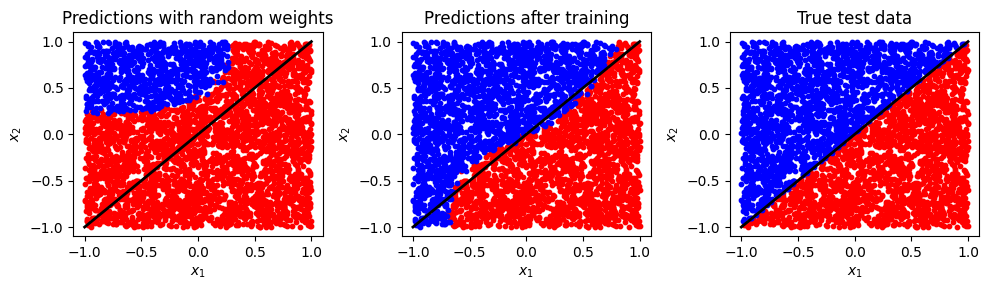

In [23]:
print(
    "Cost: {:3f} | Train accuracy {:3f} | Test Accuracy : {:3f}".format(
        loss, accuracy_train, accuracy_test
    )
)

print("Learned weights")
for i in range(num_layers):
    print("Layer {}: prameters = {}".format(i,params[i]))

fig, axes = plt.subplots(1, 3, figsize=(10, 3))
plot_data(test_data, initial_predictions, fig, axes[0], problem = "linear", condition = condition)
plot_data(test_data, predicted_test, fig, axes[1], problem = "linear", condition = condition)
plot_data(test_data, y_test, fig, axes[2], problem = "linear", condition = condition)

axes[0].set_title("Predictions with random weights")
axes[1].set_title("Predictions after training")
axes[2].set_title("True test data")
plt.tight_layout()
plt.show()

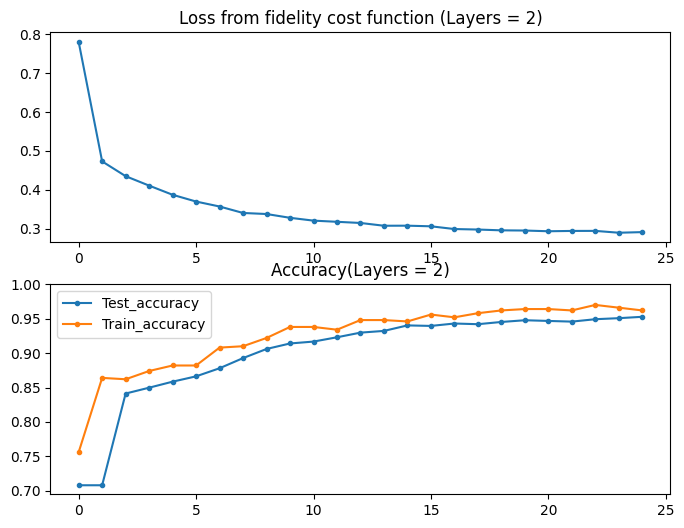

In [24]:
fig, axes = plt.subplots(2, 1, figsize=(8, 6))

axes[0].plot(loss_list,'.-')
axes[1].plot(accuracy_test_list,'.-', label = 'Test_accuracy')
axes[1].plot(accuracy_train_list,'.-', label = 'Train_accuracy')
axes[1].legend()
axes[1].set_ylim(top = 1.0)
axes[0].set_title(f"Loss from fidelity cost function (Layers = {num_layers})")
axes[1].set_title(f"Accuracy(Layers = {num_layers})")
plt.show()

_____

## Process of Compressed scheme SQC

In [ ]:
# # the numbers of training and test data
# num_training = 500
# num_test = 4000

# # Training datas(where we will train the data)
# Xdata, y_train, condition = Circle(num_training)
# train_data = np.hstack((Xdata, np.zeros((Xdata.shape[0], 1), requires_grad=False))) # point (x_1, x_2, x_3 = 0)

# # Testing datas(where we get the model accuracy)
# Xtest, y_test, condition = Circle(num_test)
# test_data = np.hstack((Xtest, np.zeros((Xtest.shape[0], 1), requires_grad=False))) # point (x_1, x_2, x_3 = 0)

# # Setting the training options
# num_layers = 6
# epochs = 50
# batch_size = 50
# eta = 0.1

# # Using the Optimizer
# opt = GradientDescentOptimizer(eta)

# # Initializing random weights the parameters for U(p)
# thetas = np.random.uniform(size=(num_layers, 3), requires_grad=True)
# weights = np.random.uniform(size=(num_layers, 3), requires_grad=True)

# ### Evaluating the classifier
# # Running the model with test data
# predicted_train, expvals_train = model_runningC(thetas, weights, train_data)
# accuracy_train = accuracy_score(y_train, predicted_train)

# # Running the model with the test data
# predicted_test, expvals_test = model_runningC(thetas, weights, test_data)
# accuracy_test = accuracy_score(y_test, predicted_test)

# # Saving predictions with random weights for comparison 
# initial_predictions = predicted_test

# loss = loss_functionC(thetas, weights, test_data, y_test)

# loss_list, accuracy_train_list, accuracy_test_list = [], [], []
# loss_list.append(loss)
# accuracy_train_list.append(accuracy_train)
# accuracy_test_list.append(accuracy_test)

# print(
#     "Epoch: {:2d} | Cost: {:3f} | Train accuracy: {:3f} | Test Accuracy: {:3f}".format(
#         0, loss, accuracy_train, accuracy_test
#     )
# )

# for it in range(epochs):
#     for Xbatch, ybatch in iterate_minibatches(train_data, y_train, batch_size=batch_size):
#         thetas, weights, _, _ = opt.step(loss_functionC, thetas, weights, Xbatch, ybatch)

#     predicted_train, expvals_train = model_runningC(thetas, weights, train_data)
#     accuracy_train = accuracy_score(y_train, predicted_train)
#     loss = loss_functionC(thetas, weights, train_data, y_train)

#     predicted_test, expvals_test = model_runningC(thetas, weights, test_data)
#     accuracy_test = accuracy_score(y_test, predicted_test)
#     res = [it + 1, loss, accuracy_train, accuracy_test]
#     print(
#         "Epoch: {:2d} | Loss: {:3f} | Train accuracy: {:3f} | Test accuracy: {:3f}".format(
#             *res
#         )
#     )
    
#     loss_list.append(loss)
#     accuracy_train_list.append(accuracy_train)
#     accuracy_test_list.append(accuracy_test)

In [30]:
# 데이터 세트 준비
num_training = 500
num_test = 4000

# 훈련 데이터 준비
Xdata, y_train, condition = Linear(num_training)
train_data = np.hstack((Xdata, np.zeros((Xdata.shape[0], 1))))  # (x_1, x_2, x_3 = 0)

# 테스트 데이터 준비
Xtest, y_test, condition = Linear(num_test)
test_data = np.hstack((Xtest, np.zeros((Xtest.shape[0], 1))))  # (x_1, x_2, x_3 = 0)

# 학습 옵션 설정
num_layers = 2
epochs = 50
batch_size = 50
eta = 0.1

# 옵티마이저 초기화
opt = GradientDescentOptimizer(eta)

# 모델 파라미터 초기화
thetas = np.random.uniform(size=(num_layers, 3))
weights = np.random.uniform(size=(num_layers, 3))
initial_predictions = predicted_test

# 조기 중단 설정
patience = 10
min_delta = 0.01
best_loss = np.inf
patience_counter = 0

# 초기 평가
predicted_train, expvals_train = model_runningC(thetas, weights, train_data)
accuracy_train = accuracy_score(y_train, predicted_train)
predicted_test, expvals_test = model_runningC(thetas, weights, test_data)
accuracy_test = accuracy_score(y_test, predicted_test)
initial_predictions = predicted_test
loss = loss_functionC(thetas, weights, test_data, y_test)

loss_list = [loss]
accuracy_train_list = [accuracy_train]
accuracy_test_list = [accuracy_test]

print(
    "Epoch: 0 | Cost: {:3f} | Train accuracy: {:3f} | Test Accuracy: {:3f}".format(
        loss, accuracy_train, accuracy_test
    )
)

# 학습 루프
for it in range(epochs):
    for Xbatch, ybatch in iterate_minibatches(train_data, y_train, batch_size=batch_size):
        thetas, weights, _, _ = opt.step(loss_functionC, thetas, weights, Xbatch, ybatch)

    predicted_train, expvals_train = model_runningC(thetas, weights, train_data)
    accuracy_train = accuracy_score(y_train, predicted_train)
    loss = loss_functionC(thetas, weights, train_data, y_train)

    predicted_test, expvals_test = model_runningC(thetas, weights, test_data)
    accuracy_test = accuracy_score(y_test, predicted_test)
    
    print(
        "Epoch: {:2d} | Loss: {:3f} | Train accuracy: {:3f} | Test accuracy: {:3f}".format(
            it + 1, loss, accuracy_train, accuracy_test
        )
    )

    loss_list.append(loss)
    accuracy_train_list.append(accuracy_train)
    accuracy_test_list.append(accuracy_test)

    # 조기 중단 체크
    if best_loss - loss > min_delta:
        best_loss = loss
        patience_counter = 0  # 성능 개선이 있으므로 카운터 초기화
    else:
        patience_counter += 1  # 성능 개선이 없으므로 카운터 증가

    # 조기 중단 조건 충족
    if patience_counter > patience:
        print(f"Early stopping triggered after {it + 1} epochs.")
        break


Epoch: 0 | Cost: 1.422112 | Train accuracy: 0.464000 | Test Accuracy: 0.504500
Epoch:  1 | Loss: 0.546056 | Train accuracy: 0.856000 | Test accuracy: 0.828250
Epoch:  2 | Loss: 0.490249 | Train accuracy: 0.866000 | Test accuracy: 0.853250
Epoch:  3 | Loss: 0.461705 | Train accuracy: 0.890000 | Test accuracy: 0.879750
Epoch:  4 | Loss: 0.444530 | Train accuracy: 0.900000 | Test accuracy: 0.886750
Epoch:  5 | Loss: 0.432351 | Train accuracy: 0.898000 | Test accuracy: 0.883750
Epoch:  6 | Loss: 0.429005 | Train accuracy: 0.898000 | Test accuracy: 0.882500
Epoch:  7 | Loss: 0.422784 | Train accuracy: 0.896000 | Test accuracy: 0.884750
Epoch:  8 | Loss: 0.422191 | Train accuracy: 0.894000 | Test accuracy: 0.884000
Epoch:  9 | Loss: 0.416615 | Train accuracy: 0.894000 | Test accuracy: 0.884500
Epoch: 10 | Loss: 0.410499 | Train accuracy: 0.896000 | Test accuracy: 0.886500
Epoch: 11 | Loss: 0.402101 | Train accuracy: 0.898000 | Test accuracy: 0.888000
Epoch: 12 | Loss: 0.397409 | Train accura

### Classifying Results

Cost: 0.311003 | Train accuracy 0.948000 | Test Accuracy : 0.931000
Learned weights
Layer 0: thetas = [0.4011024  1.65765019 0.90957346], weights = [0.64217104 1.54751782 0.51706057]
Layer 1: thetas = [0.79058611 0.85210739 0.25338201], weights = [ 1.99363012 -0.09024693  0.28178058]


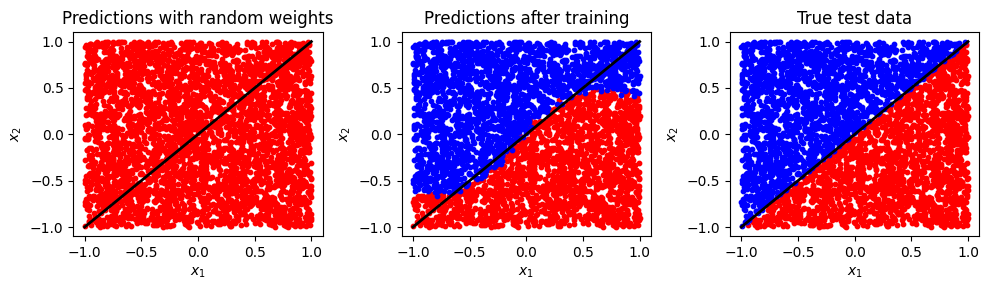

In [32]:
print(
    "Cost: {:3f} | Train accuracy {:3f} | Test Accuracy : {:3f}".format(
        loss, accuracy_train, accuracy_test
    )
)

print("Learned weights")
for i in range(num_layers):
    print("Layer {}: thetas = {}, weights = {}".format(i, thetas[i], weights[i]))

fig, axes = plt.subplots(1, 3, figsize=(10, 3))
plot_data(test_data, initial_predictions, fig, axes[0], problem = "linear", condition = condition)
plot_data(test_data, predicted_test, fig, axes[1], problem = "linear", condition = condition)
plot_data(test_data, y_test, fig, axes[2], problem = "linear", condition = condition)

axes[0].set_title("Predictions with random weights")
axes[1].set_title("Predictions after training")
axes[2].set_title("True test data")
plt.tight_layout()
plt.show()

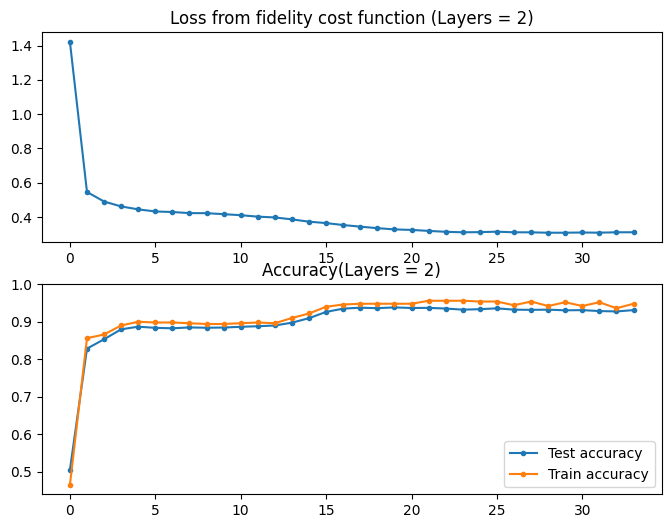

In [33]:
fig, axes = plt.subplots(2, 1, figsize=(8, 6))

axes[0].plot(loss_list,'.-')
axes[1].plot(accuracy_test_list,'.-', label = 'Test accuracy')
axes[1].plot(accuracy_train_list,'.-', label = 'Train accuracy')
axes[1].set_ylim(top = 1.0)
axes[1].legend()
axes[0].set_title(f"Loss from fidelity cost function (Layers = {num_layers})")
axes[1].set_title(f"Accuracy(Layers = {num_layers})")
plt.show()

In [34]:
# 데이터 세트 준비
num_training = 500
num_test = 4000

# 훈련 데이터 준비
Xdata, y_train, condition = Linear(num_training)
train_data = np.hstack((Xdata, np.zeros((Xdata.shape[0], 1))))  # (x_1, x_2, x_3 = 0)

# 테스트 데이터 준비
Xtest, y_test, condition = Linear(num_test)
test_data = np.hstack((Xtest, np.zeros((Xtest.shape[0], 1))))  # (x_1, x_2, x_3 = 0)

# 학습 옵션 설정
num_layers = 4
epochs = 50
batch_size = 50
eta = 0.1

# 옵티마이저 초기화
opt = GradientDescentOptimizer(eta)

# 모델 파라미터 초기화
thetas = np.random.uniform(size=(num_layers, 3))
weights = np.random.uniform(size=(num_layers, 3))
initial_predictions = predicted_test

# 조기 중단 설정
patience = 10
min_delta = 0.01
best_loss = np.inf
patience_counter = 0

# 초기 평가
predicted_train, expvals_train = model_runningC(thetas, weights, train_data)
accuracy_train = accuracy_score(y_train, predicted_train)
predicted_test, expvals_test = model_runningC(thetas, weights, test_data)
accuracy_test = accuracy_score(y_test, predicted_test)
initial_predictions = predicted_test
loss = loss_functionC(thetas, weights, test_data, y_test)

loss_list = [loss]
accuracy_train_list = [accuracy_train]
accuracy_test_list = [accuracy_test]

print(
    "Epoch: 0 | Cost: {:3f} | Train accuracy: {:3f} | Test Accuracy: {:3f}".format(
        loss, accuracy_train, accuracy_test
    )
)

# 학습 루프
for it in range(epochs):
    for Xbatch, ybatch in iterate_minibatches(train_data, y_train, batch_size=batch_size):
        thetas, weights, _, _ = opt.step(loss_functionC, thetas, weights, Xbatch, ybatch)

    predicted_train, expvals_train = model_runningC(thetas, weights, train_data)
    accuracy_train = accuracy_score(y_train, predicted_train)
    loss = loss_functionC(thetas, weights, train_data, y_train)

    predicted_test, expvals_test = model_runningC(thetas, weights, test_data)
    accuracy_test = accuracy_score(y_test, predicted_test)
    
    print(
        "Epoch: {:2d} | Loss: {:3f} | Train accuracy: {:3f} | Test accuracy: {:3f}".format(
            it + 1, loss, accuracy_train, accuracy_test
        )
    )

    loss_list.append(loss)
    accuracy_train_list.append(accuracy_train)
    accuracy_test_list.append(accuracy_test)

    # 조기 중단 체크
    if best_loss - loss > min_delta:
        best_loss = loss
        patience_counter = 0  # 성능 개선이 있으므로 카운터 초기화
    else:
        patience_counter += 1  # 성능 개선이 없으므로 카운터 증가

    # 조기 중단 조건 충족
    if patience_counter > patience:
        print(f"Early stopping triggered after {it + 1} epochs.")
        break


Epoch: 0 | Cost: 1.539688 | Train accuracy: 0.512000 | Test Accuracy: 0.505000
Epoch:  1 | Loss: 0.467906 | Train accuracy: 0.866000 | Test accuracy: 0.864750
Epoch:  2 | Loss: 0.417361 | Train accuracy: 0.892000 | Test accuracy: 0.893500
Epoch:  3 | Loss: 0.394797 | Train accuracy: 0.910000 | Test accuracy: 0.915000
Epoch:  4 | Loss: 0.383603 | Train accuracy: 0.938000 | Test accuracy: 0.930250
Epoch:  5 | Loss: 0.370948 | Train accuracy: 0.936000 | Test accuracy: 0.936250
Epoch:  6 | Loss: 0.366559 | Train accuracy: 0.928000 | Test accuracy: 0.936500
Epoch:  7 | Loss: 0.360315 | Train accuracy: 0.934000 | Test accuracy: 0.940500
Epoch:  8 | Loss: 0.356449 | Train accuracy: 0.934000 | Test accuracy: 0.946250
Epoch:  9 | Loss: 0.351946 | Train accuracy: 0.938000 | Test accuracy: 0.948250
Epoch: 10 | Loss: 0.347355 | Train accuracy: 0.946000 | Test accuracy: 0.947500
Epoch: 11 | Loss: 0.346831 | Train accuracy: 0.950000 | Test accuracy: 0.951500
Epoch: 12 | Loss: 0.342486 | Train accura

### Classifying Results

Cost: 0.255788 | Train accuracy 0.978000 | Test Accuracy : 0.972500
Learned weights
Layer 0: thetas = [0.20540368 1.12150455 0.15230498], weights = [ 0.22248502 -0.12583944  0.77310653]
Layer 1: thetas = [ 0.82903227  0.58625532 -0.00172777], weights = [0.59621675 0.82225217 0.78012753]
Layer 2: thetas = [0.53081741 1.14526465 0.50289564], weights = [1.15540093 0.11616692 0.38195972]
Layer 3: thetas = [1.09233192 0.11925325 0.46196759], weights = [ 0.21180132 -1.23484567  0.28251348]


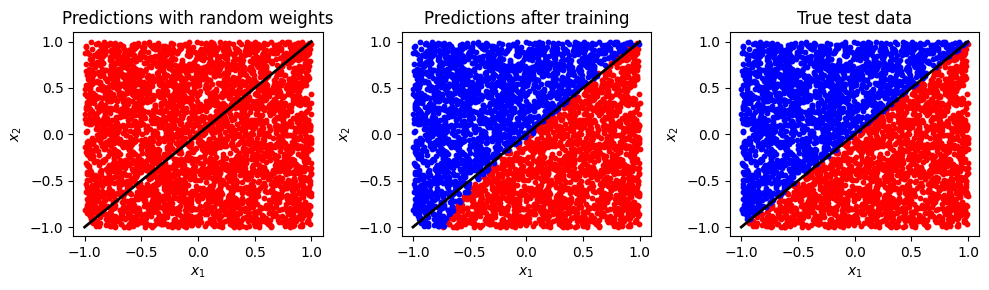

In [35]:
print(
    "Cost: {:3f} | Train accuracy {:3f} | Test Accuracy : {:3f}".format(
        loss, accuracy_train, accuracy_test
    )
)

print("Learned weights")
for i in range(num_layers):
    print("Layer {}: thetas = {}, weights = {}".format(i, thetas[i], weights[i]))

fig, axes = plt.subplots(1, 3, figsize=(10, 3))
plot_data(test_data, initial_predictions, fig, axes[0], problem = "linear", condition = condition)
plot_data(test_data, predicted_test, fig, axes[1], problem = "linear", condition = condition)
plot_data(test_data, y_test, fig, axes[2], problem = "linear", condition = condition)

axes[0].set_title("Predictions with random weights")
axes[1].set_title("Predictions after training")
axes[2].set_title("True test data")
plt.tight_layout()
plt.show()

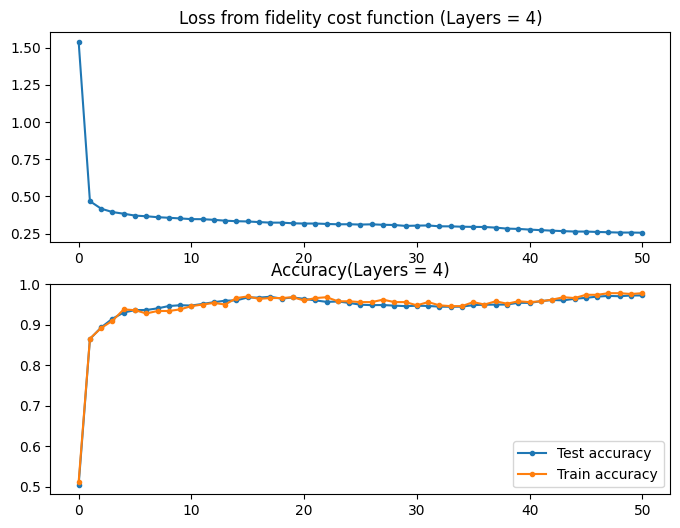

In [36]:
fig, axes = plt.subplots(2, 1, figsize=(8, 6))

axes[0].plot(loss_list,'.-')
axes[1].plot(accuracy_test_list,'.-', label = 'Test accuracy')
axes[1].plot(accuracy_train_list,'.-', label = 'Train accuracy')
axes[1].set_ylim(top = 1.0)
axes[1].legend()
axes[0].set_title(f"Loss from fidelity cost function (Layers = {num_layers})")
axes[1].set_title(f"Accuracy(Layers = {num_layers})")
plt.show()

In [ ]:
# 데이터 세트 준비
num_training = 500
num_test = 4000

# 훈련 데이터 준비
Xdata, y_train, condition = Linear(num_training)
train_data = np.hstack((Xdata, np.zeros((Xdata.shape[0], 1))))  # (x_1, x_2, x_3 = 0)

# 테스트 데이터 준비
Xtest, y_test, condition = Linear(num_test)
test_data = np.hstack((Xtest, np.zeros((Xtest.shape[0], 1))))  # (x_1, x_2, x_3 = 0)

# 학습 옵션 설정
num_layers = 8
epochs = 50
batch_size = 50
eta = 0.1

# 옵티마이저 초기화
opt = GradientDescentOptimizer(eta)

# 모델 파라미터 초기화
thetas = np.random.uniform(size=(num_layers, 3))
weights = np.random.uniform(size=(num_layers, 3))
initial_predictions = predicted_test

# 조기 중단 설정
patience = 10
min_delta = 0.01
best_loss = np.inf
patience_counter = 0

# 초기 평가
predicted_train, expvals_train = model_runningC(thetas, weights, train_data)
accuracy_train = accuracy_score(y_train, predicted_train)
predicted_test, expvals_test = model_runningC(thetas, weights, test_data)
accuracy_test = accuracy_score(y_test, predicted_test)
initial_predictions = predicted_test
loss = loss_functionC(thetas, weights, test_data, y_test)

loss_list = [loss]
accuracy_train_list = [accuracy_train]
accuracy_test_list = [accuracy_test]

print(
    "Epoch: 0 | Cost: {:3f} | Train accuracy: {:3f} | Test Accuracy: {:3f}".format(
        loss, accuracy_train, accuracy_test
    )
)

# 학습 루프
for it in range(epochs):
    for Xbatch, ybatch in iterate_minibatches(train_data, y_train, batch_size=batch_size):
        thetas, weights, _, _ = opt.step(loss_functionC, thetas, weights, Xbatch, ybatch)

    predicted_train, expvals_train = model_runningC(thetas, weights, train_data)
    accuracy_train = accuracy_score(y_train, predicted_train)
    loss = loss_functionC(thetas, weights, train_data, y_train)

    predicted_test, expvals_test = model_runningC(thetas, weights, test_data)
    accuracy_test = accuracy_score(y_test, predicted_test)
    
    print(
        "Epoch: {:2d} | Loss: {:3f} | Train accuracy: {:3f} | Test accuracy: {:3f}".format(
            it + 1, loss, accuracy_train, accuracy_test
        )
    )

    loss_list.append(loss)
    accuracy_train_list.append(accuracy_train)
    accuracy_test_list.append(accuracy_test)

    # 조기 중단 체크
    if best_loss - loss > min_delta:
        best_loss = loss
        patience_counter = 0  # 성능 개선이 있으므로 카운터 초기화
    else:
        patience_counter += 1  # 성능 개선이 없으므로 카운터 증가

    # 조기 중단 조건 충족
    if patience_counter > patience:
        print(f"Early stopping triggered after {it + 1} epochs.")
        break


Epoch: 0 | Cost: 1.230794 | Train accuracy: 0.542000 | Test Accuracy: 0.558750
Epoch:  1 | Loss: 0.368810 | Train accuracy: 0.920000 | Test accuracy: 0.942750
Epoch:  2 | Loss: 0.297466 | Train accuracy: 0.960000 | Test accuracy: 0.967000
Epoch:  3 | Loss: 0.272508 | Train accuracy: 0.968000 | Test accuracy: 0.961250
Epoch:  4 | Loss: 0.261134 | Train accuracy: 0.964000 | Test accuracy: 0.958500
Epoch:  5 | Loss: 0.252761 | Train accuracy: 0.960000 | Test accuracy: 0.961500
Epoch:  6 | Loss: 0.245382 | Train accuracy: 0.964000 | Test accuracy: 0.964000
Epoch:  7 | Loss: 0.239384 | Train accuracy: 0.968000 | Test accuracy: 0.966500
Epoch:  8 | Loss: 0.234727 | Train accuracy: 0.970000 | Test accuracy: 0.968000
Epoch:  9 | Loss: 0.230268 | Train accuracy: 0.966000 | Test accuracy: 0.970000
Epoch: 10 | Loss: 0.222544 | Train accuracy: 0.978000 | Test accuracy: 0.972000
Epoch: 11 | Loss: 0.214799 | Train accuracy: 0.982000 | Test accuracy: 0.974500
Epoch: 12 | Loss: 0.215368 | Train accura

### Classifying Results

In [ ]:
print(
    "Cost: {:3f} | Train accuracy {:3f} | Test Accuracy : {:3f}".format(
        loss, accuracy_train, accuracy_test
    )
)

print("Learned weights")
for i in range(num_layers):
    print("Layer {}: thetas = {}, weights = {}".format(i, thetas[i], weights[i]))

fig, axes = plt.subplots(1, 3, figsize=(10, 3))
plot_data(test_data, initial_predictions, fig, axes[0], problem = "linear", condition = condition)
plot_data(test_data, predicted_test, fig, axes[1], problem = "linear", condition = condition)
plot_data(test_data, y_test, fig, axes[2], problem = "linear", condition = condition)

axes[0].set_title("Predictions with random weights")
axes[1].set_title("Predictions after training")
axes[2].set_title("True test data")
plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(8, 6))

axes[0].plot(loss_list,'.-')
axes[1].plot(accuracy_test_list,'.-', label = 'Test accuracy')
axes[1].plot(accuracy_train_list,'.-', label = 'Train accuracy')
axes[1].set_ylim(top = 1.0)
axes[1].legend()
axes[0].set_title(f"Loss from fidelity cost function (Layers = {num_layers})")
axes[1].set_title(f"Accuracy(Layers = {num_layers})")
plt.show()

--------

In [ ]:
### Origin scheme sinle-qubit classifier model

# the numbers of training and test data
num_training = 500
num_test = 4000

# Training datas(where we will train the data)
Xdata, y_train, condition = Sin(num_training)
# for 2-dim points
train_data = np.hstack((Xdata, np.zeros((Xdata.shape[0], 1), requires_grad=False))) # point (x_1, x_2, x_3 = 0)

# Testing datas(where we get the model accuracy)
Xtest, y_test, condition = Sin(num_test)
# for 2-dim points
test_data = np.hstack((Xtest, np.zeros((Xtest.shape[0], 1), requires_grad=False))) # point (x_1, x_2, x_3 = 0)

# Setting the training options
num_layers = 6
epochs = 50
batch_size = 50
eta = 0.1

# Using the Optimizer
opt = GradientDescentOptimizer(eta)

# Initializing random weights the parameters for U(p)
thetas = np.random.uniform(size=(num_layers, 3), requires_grad=True)
weights = np.random.uniform(size=(num_layers, 3), requires_grad=True)

### Evaluating the classifier
# Running the model with test data
predicted_train, expvals_train = model_runningC(thetas, weights, train_data)
accuracy_train = accuracy_score(y_train, predicted_train)

# Running the model with the test data
predicted_test, expvals_test = model_runningC(thetas, weights, test_data)
accuracy_test = accuracy_score(y_test, predicted_test)

# Saving predictions with random weights for comparison 
initial_predictions = predicted_test

loss = loss_functionC(thetas, weights, test_data, y_test)

loss_list, accuracy_train_list, accuracy_test_list = [], [], []
loss_list.append(loss)
accuracy_train_list.append(accuracy_train)
accuracy_test_list.append(accuracy_test)

print(
    "Epoch: {:2d} | Cost: {:3f} | Train accuracy: {:3f} | Test Accuracy: {:3f}".format(
        0, loss, accuracy_train, accuracy_test
    )
)

for it in range(epochs):
    for Xbatch, ybatch in iterate_minibatches(train_data, y_train, batch_size=batch_size):
        thetas, weights, _, _ = opt.step(loss_functionC, thetas, weights, Xbatch, ybatch)

    predicted_train, expvals_train = model_runningC(thetas, weights, train_data)
    accuracy_train = accuracy_score(y_train, predicted_train)
    loss = loss_functionC(thetas, weights, train_data, y_train)

    predicted_test, expvals_test = model_runningC(thetas, weights, test_data)
    accuracy_test = accuracy_score(y_test, predicted_test)
    res = [it + 1, loss, accuracy_train, accuracy_test]
    print(
        "Epoch: {:2d} | Loss: {:3f} | Train accuracy: {:3f} | Test accuracy: {:3f}".format(
            *res
        )
    )
    
    loss_list.append(loss)
    accuracy_train_list.append(accuracy_train)
    accuracy_test_list.append(accuracy_test)

In [ ]:
print(
    "Cost: {:3f} | Train accuracy {:3f} | Test Accuracy : {:3f}".format(
        loss, accuracy_train, accuracy_test
    )
)

print("Learned weights")
for i in range(num_layers):
    print("Layer {}: thetas = {}, weights = {}".format(i, thetas[i], weights[i]))

fig, axes = plt.subplots(1, 3, figsize=(10, 3))
plot_data(test_data, initial_predictions, fig, axes[0], problem = "sin", condition = condition)
plot_data(test_data, predicted_test, fig, axes[1], problem = "sin", condition = condition)
plot_data(test_data, y_test, fig, axes[2], problem = "sin", condition = condition)

axes[0].set_title("Predictions with random weights")
axes[1].set_title("Predictions after training")
axes[2].set_title("True test data")
plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(8, 6))

axes[0].plot(loss_list,'.-')
axes[1].plot(accuracy_test_list,'.-', label = 'Test accuracy')
axes[1].plot(accuracy_train_list,'.-', label = 'Train accuracy')
axes[1].set_ylim(top = 1.0)
axes[1].legend()
axes[0].set_title(f"Loss from fidelity cost function (Layers = {num_layers})")
axes[1].set_title(f"Accuracy(Layers = {num_layers})")
plt.show()

--------

In [13]:
### Origin scheme sinle-qubit classifier model

# the numbers of training and test data
num_training = 1000
num_test = 5000

# Training datas(where we will train the data)
Xdata, y_train, condition = Square(num_training)
# for 2-dim points
train_data = np.hstack((Xdata, np.zeros((Xdata.shape[0], 1), requires_grad=False))) # point (x_1, x_2, x_3 = 0)

# Testing datas(where we get the model accuracy)
Xtest, y_test, condition = Square(num_test)
# for 2-dim points
test_data = np.hstack((Xtest, np.zeros((Xtest.shape[0], 1), requires_grad=False))) # point (x_1, x_2, x_3 = 0)

# Setting the training options
num_layers = 12
epochs = 50
batch_size = 250
eta = 0.07

# Using the Optimizer
opt = GradientDescentOptimizer(eta)

# Initializing random weights the parameters for U(p)
thetas = np.random.uniform(size=(num_layers, 3), requires_grad=True)
weights = np.random.uniform(size=(num_layers, 3), requires_grad=True)

### Evaluating the classifier
# Running the model with test data
predicted_train, expvals_train = model_runningC(thetas, weights, train_data)
accuracy_train = accuracy_score(y_train, predicted_train)

# Running the model with the test data
predicted_test, expvals_test = model_runningC(thetas, weights, test_data)
accuracy_test = accuracy_score(y_test, predicted_test)

# Saving predictions with random weights for comparison 
initial_predictions = predicted_test

loss = loss_functionC(thetas, weights, test_data, y_test)

loss_list, accuracy_train_list, accuracy_test_list = [], [], []
loss_list.append(loss)
accuracy_train_list.append(accuracy_train)
accuracy_test_list.append(accuracy_test)

print(
    "Epoch: {:2d} | Cost: {:3f} | Train accuracy: {:3f} | Test Accuracy: {:3f}".format(
        0, loss, accuracy_train, accuracy_test
    )
)

for it in range(epochs):
    for Xbatch, ybatch in iterate_minibatches(train_data, y_train, batch_size=batch_size):
        thetas, weights, _, _ = opt.step(loss_functionC, thetas, weights, Xbatch, ybatch)

    predicted_train, expvals_train = model_runningC(thetas, weights, train_data)
    accuracy_train = accuracy_score(y_train, predicted_train)
    loss = loss_functionC(thetas, weights, train_data, y_train)

    predicted_test, expvals_test = model_runningC(thetas, weights, test_data)
    accuracy_test = accuracy_score(y_test, predicted_test)
    res = [it + 1, loss, accuracy_train, accuracy_test]
    print(
        "Epoch: {:2d} | Loss: {:3f} | Train accuracy: {:3f} | Test accuracy: {:3f}".format(
            *res
        )
    )
    
    loss_list.append(loss)
    accuracy_train_list.append(accuracy_train)
    accuracy_test_list.append(accuracy_test)

Epoch:  0 | Cost: 1.044690 | Train accuracy: 0.628000 | Test Accuracy: 0.648800
Epoch:  1 | Loss: 0.869678 | Train accuracy: 0.689000 | Test accuracy: 0.713600
Epoch:  2 | Loss: 0.759178 | Train accuracy: 0.729000 | Test accuracy: 0.760800
Epoch:  3 | Loss: 0.667143 | Train accuracy: 0.781000 | Test accuracy: 0.800000
Epoch:  4 | Loss: 0.595682 | Train accuracy: 0.801000 | Test accuracy: 0.817600
Epoch:  5 | Loss: 0.531196 | Train accuracy: 0.820000 | Test accuracy: 0.828400
Epoch:  6 | Loss: 0.493614 | Train accuracy: 0.842000 | Test accuracy: 0.852200
Epoch:  7 | Loss: 0.473917 | Train accuracy: 0.855000 | Test accuracy: 0.865600
Epoch:  8 | Loss: 0.461708 | Train accuracy: 0.856000 | Test accuracy: 0.867200
Epoch:  9 | Loss: 0.453510 | Train accuracy: 0.867000 | Test accuracy: 0.867600
Epoch: 10 | Loss: 0.448404 | Train accuracy: 0.865000 | Test accuracy: 0.868400
Epoch: 11 | Loss: 0.441856 | Train accuracy: 0.867000 | Test accuracy: 0.869200
Epoch: 12 | Loss: 0.437324 | Train accur

In [ ]:
print(
    "Cost: {:3f} | Train accuracy {:3f} | Test Accuracy : {:3f}".format(
        loss, accuracy_train, accuracy_test
    )
)

print("Learned weights")
for i in range(num_layers):
    print("Layer {}: thetas = {}, weights = {}".format(i, thetas[i], weights[i]))

fig, axes = plt.subplots(1, 3, figsize=(10, 3))
plot_data(test_data, initial_predictions, fig, axes[0], problem = "square", condition = condition)
plot_data(test_data, predicted_test, fig, axes[1], problem = "square", condition = condition)
plot_data(test_data, y_test, fig, axes[2], problem = "square", condition = condition)

axes[0].set_title("Predictions with random weights")
axes[1].set_title("Predictions after training")
axes[2].set_title("True test data")
plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(8, 6))

axes[0].plot(loss_list,'.-')
axes[1].plot(accuracy_test_list,'.-', label = 'Test accuracy')
axes[1].plot(accuracy_train_list,'.-', label = 'Train accuracy')
axes[1].set_ylim(top = 1.0)
axes[1].legend()
axes[0].set_title(f"Loss from fidelity cost function (Layers = {num_layers})")
axes[1].set_title(f"Accuracy(Layers = {num_layers})")
plt.show()

--------

In [ ]:
### Origin scheme sinle-qubit classifier model

# the numbers of training and test data
num_training = 750
num_test = 2000

# Training datas(where we will train the data)
train_data, y_train, condition = Sphere(num_training)

# Testing datas(where we get the model accuracy)
test_data, y_test, condition = Sphere(num_test)

# Setting the training options
num_layers = 10
epochs = 50
batch_size = 50
eta = 0.1

# Using the Optimizer
opt = GradientDescentOptimizer(eta)

# Initializing random weights the parameters for U(p)
thetas = np.random.uniform(size=(num_layers, 3), requires_grad=True)
weights = np.random.uniform(size=(num_layers, 3), requires_grad=True)

### Evaluating the classifier
# Running the model with test data
predicted_train, expvals_train = model_runningC(thetas, weights, train_data)
accuracy_train = accuracy_score(y_train, predicted_train)

# Running the model with the test data
predicted_test, expvals_test = model_runningC(thetas, weights, test_data)
accuracy_test = accuracy_score(y_test, predicted_test)

# Saving predictions with random weights for comparison 
initial_predictions = predicted_test

loss = loss_functionC(thetas, weights, test_data, y_test)

loss_list, accuracy_train_list, accuracy_test_list = [], [], []
loss_list.append(loss)
accuracy_train_list.append(accuracy_train)
accuracy_test_list.append(accuracy_test)

print(
    "Epoch: {:2d} | Cost: {:3f} | Train accuracy: {:3f} | Test Accuracy: {:3f}".format(
        0, loss, accuracy_train, accuracy_test
    )
)

for it in range(epochs):
    for Xbatch, ybatch in iterate_minibatches(train_data, y_train, batch_size=batch_size):
        thetas, weights, _, _ = opt.step(loss_functionC, thetas, weights, Xbatch, ybatch)

    predicted_train, expvals_train = model_runningC(thetas, weights, train_data)
    accuracy_train = accuracy_score(y_train, predicted_train)
    loss = loss_functionC(thetas, weights, train_data, y_train)

    predicted_test, expvals_test = model_runningC(thetas, weights, test_data)
    accuracy_test = accuracy_score(y_test, predicted_test)
    res = [it + 1, loss, accuracy_train, accuracy_test]
    print(
        "Epoch: {:2d} | Loss: {:3f} | Train accuracy: {:3f} | Test accuracy: {:3f}".format(
            *res
        )
    )
    
    loss_list.append(loss)
    accuracy_train_list.append(accuracy_train)
    accuracy_test_list.append(accuracy_test)

In [ ]:
print(
    "Cost: {:3f} | Train accuracy {:3f} | Test Accuracy : {:3f}".format(
        loss, accuracy_train, accuracy_test
    )
)

print("Learned weights")
for i in range(num_layers):
    print("Layer {}: thetas = {}, weights = {}".format(i, thetas[i], weights[i]))

fig, axes = plt.subplots(1, 3, figsize=(10, 6),subplot_kw={"projection":"3d"})
plot_data(test_data, initial_predictions, fig, axes[0], problem = "sphere", condition = condition)
plot_data(test_data, predicted_test, fig, axes[1], problem = "sphere", condition = condition)
plot_data(test_data, y_test, fig, axes[2], problem = "sphere", condition = condition)

axes[0].set_title("Predictions with random weights")
axes[1].set_title("Predictions after training")
axes[2].set_title("True test data")
plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(8, 6))

axes[0].plot(loss_list,'.-')
axes[1].plot(accuracy_test_list,'.-', label = 'Test accuracy')
axes[1].plot(accuracy_train_list,'.-', label = 'Train accuracy')
axes[1].set_ylim(top = 1.0)
axes[1].legend()
axes[0].set_title(f"Loss from fidelity cost function (Layers = {num_layers})")
axes[1].set_title(f"Accuracy(Layers = {num_layers})")
plt.show()